In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Por medio del siguiente código se cargan los datos y se convierten en un dataframe

In [2]:
df = pd.read_csv('/Users/lescobar/Desktop/Proyecto Integrador/data/filtered_dataset.csv', index_col="patient_id")

A continuación, observamos las tres primeras observaciones del dataset con lo cual evidenciamos la existencia de variables cuantitativas y variables categóricas

In [3]:
df.head(3)

,treatment,birth_date,start_date,start_night,end_night,gender,height,weight,age,smoking,...,sistolic,diastolic,heart_rate,mean_arterial_pressure,pulse_pressure,stroke_volume,cardiac_output,cardiac_index,systemic_vascular_resistance,pulse_wave_velocity
patient_id,,,,,,,,,,,,,,,,,,,,,
30,True,1983-12-25 00:00:00,2017-11-01 07:02:00,2017-10-27 04:30:00,2017-10-27 06:30:00,m,1.78,102.0,33.854327,0,...,120.457143,79.957143,72.685714,95.0,41.0,72.0,5.3,2.3,1158.0,5.7
31,False,1946-10-09 00:00:00,2017-11-01 08:40:00,2017-11-02 02:00:00,2017-11-02 04:00:00,m,1.67,82.4,71.064644,0,...,143.405405,91.067568,65.500000,111.0,52.0,83.0,5.4,2.8,1417.0,12.4
32,True,1960-02-14 00:00:00,2017-11-01 09:57:00,2017-11-02 03:00:00,2017-11-02 05:00:00,m,1.70,93.2,57.715030,0,...,122.557143,90.257143,80.628571,102.0,32.0,78.0,6.3,3.0,1319.0,9.0


Eliminamos del dataset las variables categóricas y variables de tiempo y nos quedamos con las variables métricas con el fin de encontrar la matriz de covarianzas y la matriz de correlaciones

In [4]:
df_X = df.drop(['treatment','gender','smoking','excercise_frecuency','beer','wine','alcohol','strong_licor','birth_date', 'start_date', 'start_night', 'end_night'], axis=1)

In [5]:
df_X.head(3)

,height,weight,age,sistolic,diastolic,heart_rate,mean_arterial_pressure,pulse_pressure,stroke_volume,cardiac_output,cardiac_index,systemic_vascular_resistance,pulse_wave_velocity
patient_id,,,,,,,,,,,,,
30,1.78,102.0,33.854327,120.457143,79.957143,72.685714,95.0,41.0,72.0,5.3,2.3,1158.0,5.7
31,1.67,82.4,71.064644,143.405405,91.067568,65.500000,111.0,52.0,83.0,5.4,2.8,1417.0,12.4
32,1.70,93.2,57.715030,122.557143,90.257143,80.628571,102.0,32.0,78.0,6.3,3.0,1319.0,9.0


Calculamos la matriz de correlación de Pearson de las variables métricas con la intención de encontrar, si existe, una relación lineal entre cada par de variables continuas. 

In [6]:
## matriz de correlación
corrmat = df_X.corr();
corrmat

,height,weight,age,sistolic,diastolic,heart_rate,mean_arterial_pressure,pulse_pressure,stroke_volume,cardiac_output,cardiac_index,systemic_vascular_resistance,pulse_wave_velocity
height,1.000000,0.665879,-0.294046,0.100961,0.239337,-0.036881,0.186739,-0.101523,0.059474,0.002993,-0.469506,-0.182314,-0.318396
weight,0.665879,1.000000,-0.224193,0.191427,0.255605,0.085485,0.241300,0.016453,0.180691,0.147281,-0.456798,-0.109898,-0.226263
age,-0.294046,-0.224193,1.000000,0.047495,-0.247457,-0.242822,-0.117678,0.330445,-0.003052,-0.182363,-0.013023,0.461695,0.923730
sistolic,0.100961,0.191427,0.047495,1.000000,0.742891,0.016116,0.923201,0.708346,0.918655,0.431486,0.268347,0.703937,0.343382
diastolic,0.239337,0.255605,-0.247457,0.742891,1.000000,0.237941,0.941763,0.054971,0.837260,0.560602,0.329027,0.695099,0.020821
heart_rate,-0.036881,0.085485,-0.242822,0.016116,0.237941,1.000000,0.143582,-0.225435,0.362350,0.903641,0.750018,-0.039626,-0.119406
mean_arterial_pressure,0.186739,0.241300,-0.117678,0.923201,0.941763,0.143582,1.000000,0.384527,0.936763,0.535293,0.321837,0.748875,0.183310
pulse_pressure,-0.101523,0.016453,0.330445,0.708346,0.054971,-0.225435,0.384527,1.000000,0.488476,0.054013,0.054394,0.316256,0.489092
stroke_volume,0.059474,0.180691,-0.003052,0.918655,0.837260,0.362350,0.936763,0.488476,1.000000,0.721555,0.531387,0.728771,0.311994
cardiac_output,0.002993,0.147281,-0.182363,0.431486,0.560602,0.903641,0.535293,0.054013,0.721555,1.000000,0.796010,0.302048,0.052007


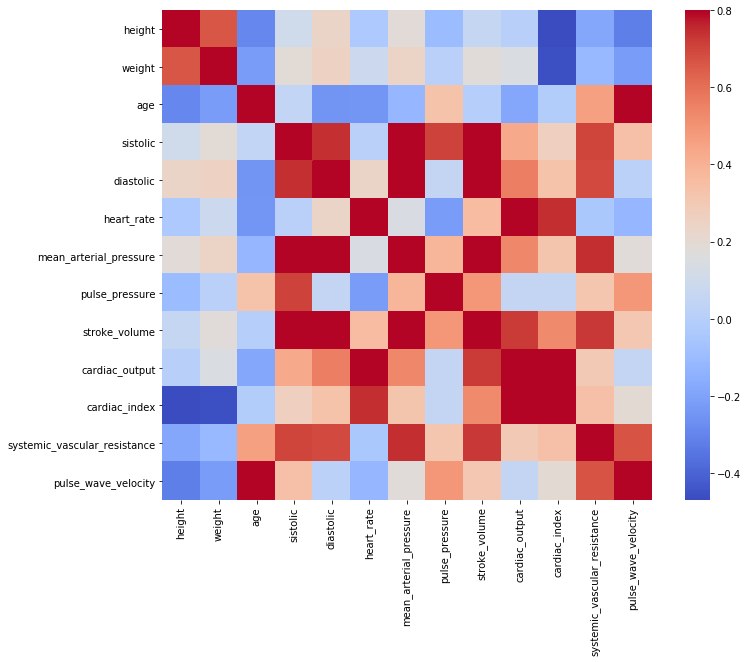

In [7]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="coolwarm")

El anterior resultado, permite observar el grado de dependencia existente entre las variables. Se puede observar que existe una alta asociación lineal entre la variable "mean_arterial_pressure" y "sistolic", dicho valor es de 0.923, entre las variables "mean_arterial_pressure" y "diastolic" con una dependencia de 0.942, la variable "mean_arterial_pressure" también presenta una alta correlación con "stroke_volume", dicha correlación es de 0.937; otras correlaciones altas que se pueden evidenciar son las existentes entre las  variable "stroke_volume" y "sistolic" tienen una correlación de 0.919, "stroke_volume" y "diastolic" tienen una correlación de 0.837. \
Es importante resaltar también la correlación existente entre la variable "cardiac_output" y "heart_rate", pues se observa un valor de 0.904 lo que indica una alta dependencia entre ellas. De la misma manera, se encuentra relaciones lineales entre las variables "pulse_wave_velocity" y "age".

Teniendo en cuenta estos resultados, es posible entonces expresar estas variables como una combinación lineal de otras; lo que indicaría entonces presencia de colinealidad si ajustaramos modelos de regresión. Por tal motivo eliminamos las siguientes variables del estudio: "mean_arterial_pressure", "stroke_volume", "cardiac_output" y "pulse_wave_velocity".

In [8]:
highly_correlated = ["mean_arterial_pressure", "stroke_volume", "cardiac_output", "pulse_wave_velocity"]

In [9]:
corrmat = df_X[[item for item in df_X.columns if not(item in highly_correlated)]].corr();
corrmat

,height,weight,age,sistolic,diastolic,heart_rate,pulse_pressure,cardiac_index,systemic_vascular_resistance
height,1.000000,0.665879,-0.294046,0.100961,0.239337,-0.036881,-0.101523,-0.469506,-0.182314
weight,0.665879,1.000000,-0.224193,0.191427,0.255605,0.085485,0.016453,-0.456798,-0.109898
age,-0.294046,-0.224193,1.000000,0.047495,-0.247457,-0.242822,0.330445,-0.013023,0.461695
sistolic,0.100961,0.191427,0.047495,1.000000,0.742891,0.016116,0.708346,0.268347,0.703937
diastolic,0.239337,0.255605,-0.247457,0.742891,1.000000,0.237941,0.054971,0.329027,0.695099
heart_rate,-0.036881,0.085485,-0.242822,0.016116,0.237941,1.000000,-0.225435,0.750018,-0.039626
pulse_pressure,-0.101523,0.016453,0.330445,0.708346,0.054971,-0.225435,1.000000,0.054394,0.316256
cardiac_index,-0.469506,-0.456798,-0.013023,0.268347,0.329027,0.750018,0.054394,1.000000,0.339204
systemic_vascular_resistance,-0.182314,-0.109898,0.461695,0.703937,0.695099,-0.039626,0.316256,0.339204,1.000000


El anterior filtro nos permitió realizar el análisis con 9 variables métricas, en el que encontramos algunas correlaciones que no son tan altas como en las variables que no hemos considerado en este estudio. En la siguiente salida, se puede observar el anterior resultado representado en una gráfica

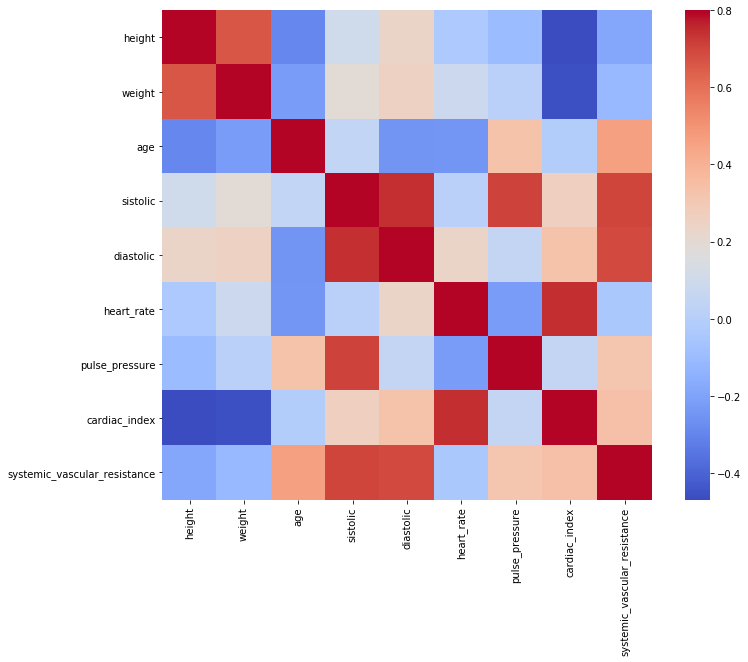

In [10]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="coolwarm")

Se calcula la matriz de varianzas y covarianzas, la cual resulta ser una matriz cuadrada que contiene las varianzas y covarianzas asociadas a las diferentes variables. Los elementos de la diagonal de la matriz contienen las varianzas de las variables, mientras que los elementos que se encuentran por fuera de la diagonal contienen las covarianzas entre todos los pares posibles de variables.

In [18]:
## matriz de covarianzas
m_cov = np.cov(df_X[[item for item in df_X.columns if not(item in highly_correlated)]],rowvar=False)
m_cov

array([[ 9.05410535e-03,  8.56006267e-01, -3.94155805e-01,
         1.13983595e-01,  1.90777678e-01, -3.16788430e-02,
        -7.69977241e-02, -2.65087699e-02, -1.27378498e+00],
       [ 8.56006267e-01,  1.82522818e+02, -4.26687307e+01,
         3.06851304e+01,  2.89282778e+01,  1.04254846e+01,
         1.77169334e+00, -3.66191795e+00, -1.09018547e+02],
       [-3.94155805e-01, -4.26687307e+01,  1.98453884e+02,
         7.93855493e+00, -2.92027940e+01, -3.08790827e+01,
         3.71038273e+01, -1.08855530e-01,  4.77571422e+02],
       [ 1.13983595e-01,  3.06851304e+01,  7.93855493e+00,
         1.40777562e+02,  7.38391389e+01,  1.72609285e+00,
         6.69887156e+01,  1.88925144e+00,  6.13272355e+02],
       [ 1.90777678e-01,  2.89282778e+01, -2.92027940e+01,
         7.38391389e+01,  7.01760879e+01,  1.79932488e+01,
         3.67045500e+00,  1.63550609e+00,  4.27556879e+02],
       [-3.16788430e-02,  1.04254846e+01, -3.08790827e+01,
         1.72609285e+00,  1.79932488e+01,  8.148770

Se procede a calcular la traza de la matriz de varianzas y covarianzas. Este resultado es una medida global de la dispersión para este conjunto de datos.

In [12]:
## traza de la matriz de covarianzas---Varianza total
np.trace(m_cov)

6128.762366140804

Como se puede observar, existe una alta variabilidad en el conjunto de datos, pues se observa que la varianza total es 6128.76

Pretendemos encontrar ahora una medidad de la variabilidad conjunta de las 9 variables cuantitativas, o sea, queremos encontrar la varianza generalizada del conjunto de datos

In [15]:
## determinante de la matriz de covarianzas---Varianza generalizada
np.linalg.det(m_cov)

5989029.95601421

El conjunto de datos, presenta una varianza generalizada de 5989029.95

In [14]:
df[[item for item in df.columns if not(item in highly_correlated)]].to_csv("data/filtered1_dataset.csv")